In [1]:
# after implementing new envelope misfit function,
# would like to check gradient consistency
# the testdata/testsrc setup could be used for that.

In [86]:
# what we need for preparation:
# - compute the gradient for the input source
# - have a vector of smaller and smaller steps
# - have a random update to the model
# - compute m0

# what we do then for each step in the step vector:
# - scale the random update by this step
# - compute the model of the input plus the update
# - get the misfit of that model output
# - get the relative error between this misfit and m0
# - record (step,relative error)

In [87]:
import os
import numpy as np
from obspy import read
from pandas import read_csv
import h5py
import matplotlib.pyplot as plt

In [88]:
# compute the gradient for the input model
os.system('cp -R ../test/testdata/testsrc/wavefield_processed_archived/ \
          ../test/testdata/testsrc/wavefield_processed')
os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
os.mkdir('../test/testdata/testsrc/step_0/corr')
os.mkdir('../test/testdata/testsrc/step_0/adjt')
os.mkdir('../test/testdata/testsrc/step_0/kern')
os.mkdir('../test/testdata/testsrc/step_0/grad')
os.system('cp inputs/measr_config.json ../test/testdata/testsrc/')
os.system('cp inputs/source_config.json ../test/testdata/testsrc/')
os.system('cp inputs/config.json ../test/testdata/')

0

In [89]:
os.system('noisi correlation ../test/testdata/testsrc 0')
### remove output after finishing

0

In [91]:
os.system('noisi measurement ../test/testdata/testsrc 0')
m0 = read_csv('../test/testdata/testsrc/step_0/energy_diff.0.measurement.csv')['l2_norm'][0]
print(m0)

373.978599597


In [92]:
os.system('noisi kernel ../test/testdata/testsrc 0')

0

In [97]:
os.system('noisi gradient ../test/testdata/testsrc 0')

0

In [108]:
eps = np.arange(-7,1,0.2)

In [99]:
grad = np.load('../test/testdata/testsrc/step_0/grad/grad_all.npy')
print(grad)

[[ 7.95420555  8.46952496  9.34841948 ...,  9.16548192  8.18748012
   7.59011463]]


In [100]:
direction = (np.random.random((grad.shape))-0.5)

In [101]:
m_grad = np.dot(direction,np.transpose(grad))[0]
print(m_grad)

[-145.45754859]


In [106]:

def get_misfit_from_direction(dvec):
    os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
    
    os.system('cp ../test/testdata/testsrc/step_0/starting_model_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
    f = h5py.File('../test/testdata/testsrc/step_0/starting_model.h5','a')
    
    f['distr_basis'][:] += dvec
    f.close()

    
    os.system('rm ../test/testdata/testsrc/step_0/corr/\
NET.STA1..CHA--NET.STA2..CHA.sac')
    
    os.system('rm ../test/testdata/testsrc/step_0/\
energy_diff.0.measurement.csv')
    
    os.system('noisi correlation ../test/testdata/testsrc 0')
    tr = read('../test/testdata/testsrc/step_0/corr/*')
    corr = tr[0].data
    os.system('noisi measurement ../test/testdata/testsrc 0')
    msr = read_csv('../test/testdata/testsrc/step_0/\
energy_diff.0.measurement.csv')
    msr = msr['l2_norm'][0]
    
    return(msr,corr)
    
    
    

In [ ]:
results = np.zeros(len(eps))
mf_a = np.zeros(len(eps))
plt.figure
for i in range(len(eps)):
    print(i)
    val = 10**eps[i]
    msr1,corr = get_misfit_from_direction(val*direction)
    msr2,corr2 = get_misfit_from_direction(-val*direction)
    mf_approx = 1./(2.*val)*(msr1-msr2)
    print(mf_approx)
    results[i] = np.abs(m_grad-mf_approx)/np.abs(m_grad)
    mf_a[i] = mf_approx
    print(results[i])
    plt.plot(corr)

plt.show()
plt.semilogy(eps,results)
plt.show()

0
-59.3936198356
0.591677294083
1
-35.5869576585
0.755344717384
2
-26.7516562927
0.816086160173
3
-57.5941357645
0.60404849165
4
-75.7248563024
0.479402361463
5
-71.9046660151
0.505665627442
6
-78.3214291123
0.461551291958
7
-71.4484601853
0.508801977768
8
-72.6790021742
0.50034217626
9
-72.6860953457
0.500293411713
10
-73.3348147946
0.495833557582
11
-71.9675155263
0.505233545974
12
-72.318501631
0.502820566324
13
-72.821731699
0.499360931036
14
-72.7752498445
0.499680487188
15
-72.7827455015
0.49962895561
16
-72.6905433446
0.500262832351
17
-72.7302421282
0.499989908849
18
-72.7016688552
0.500186346045
19
-72.7390270449
0.499929513794
20
-72.7287770497
0.499999981056
21
-72.7351822685
0.499955946086
22
-72.7280637269
0.500004885049
23
-72.7293868925
0.499995788473
24
-72.7304953738
0.499988167822
25
-72.7282713553
0.500003457633
26
-72.7287560461
0.500000125453
27
-72.7292767946
0.499996545381
28
-72.7297406282
0.499993356591
29
-72.7309740452
0.499984877024
30
-72.734009515
0.499964

In [84]:
# removing copied files...
os.system('rm -rf ../test/testdata/testsrc/wavefield_processed')
os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('rm -rf ../test/testdata/testsrc/step_0/corr')
os.system('rm -rf ../test/testdata/testsrc/step_0/adjt')
os.system('rm -rf ../test/testdata/testsrc/step_0/kern')
os.system('rm -rf ../test/testdata/testsrc/step_0/grad')
os.system('rm ../test/testdata/testsrc/measr_config.json')
os.system('rm ../test/testdata/testsrc/source_config.json')
os.system('rm ../test/testdata/config.json')

0

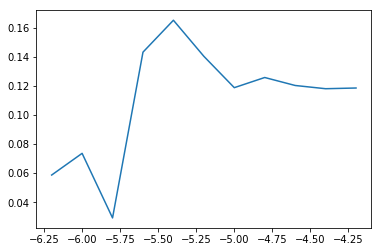

In [85]:
plt.plot(eps[4:],results[4:])
#plt.xlabel('Log(step_width)')
#plt.ylabel('Relative error')
plt.show()

In [32]:
print(msr2)

64.1865236627
